## This is the code for linear classification using sigmoid function

In [370]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification

## Now we will generate classification dataset

In [371]:
make_classification

<function sklearn.datasets._samples_generator.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)>

In [372]:
datasets = make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_redundant = 0,random_state = 420)
X,y = datasets


In [373]:
df = pd.DataFrame({"X1": X[:,0], "X2":X[:,1],"Y": y})

# We will benchmark the sigmoid linear classifier against the perceptron trick classifier

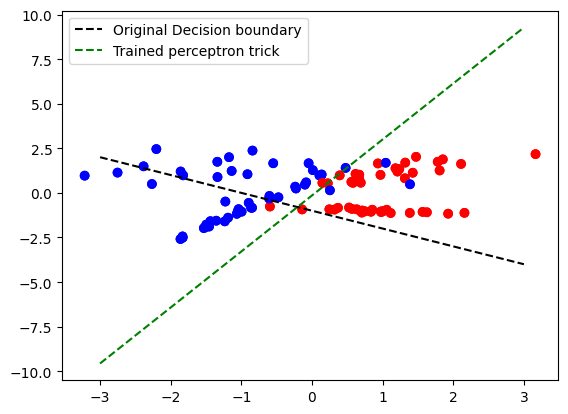

In [374]:
X = np.hstack((X,np.ones((100,1))))
W = np.array([1.0,1.0,1.0])
x_vals = np.array([-3,3])
y_vals = (-W[0]*x_vals-W[2])/W[1] # 2 points
plt.scatter(df["X1"],df["X2"],c = y,cmap="bwr")
plt.plot(x_vals,y_vals,'--k',label = "Original Decision boundary")
epochs = 1000
lr = 0.01
for i in range(epochs):
    idx = np.random.randint(0,len(X))
    if y[idx]==0 and np.dot(W,X[idx])>=0:
        W -= lr*X[idx]
    elif y[idx]==1 and np.dot(W,X[idx])<0:
        W += lr*X[idx]
y_vals2 = (-W[2]-W[0]*x_vals)/W[1]
plt.scatter(df["X1"],df["X2"],c = y,cmap="bwr")
plt.plot(x_vals,y_vals2,'--g',label = "Trained perceptron trick")
plt.legend()
plt.show()

In [375]:
W

array([ 0.86195951, -0.27451684, -0.04      ])

# Now lets make the sigmoid model

In [376]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

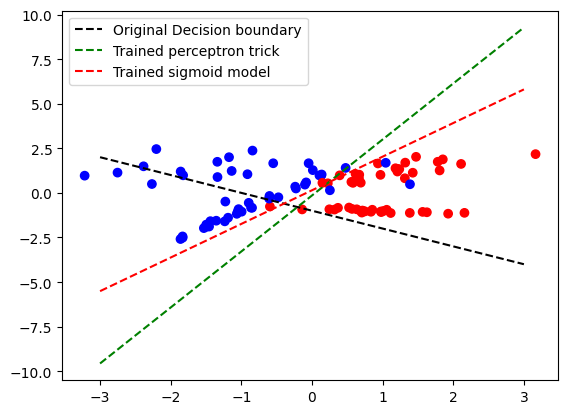

In [377]:
epochs = 1000
lr = 0.01
for i in range(epochs):
    idx = np.random.randint(0,len(X))
    if y[idx]==0 and sigmoid(np.dot(W,X[idx]))>=0.5:
        W -= lr*X[idx]
    elif y[idx]==1 and sigmoid(np.dot(W,X[idx]))<0.5:
        W += lr*X[idx]
y_vals3 = (-W[2]-W[0]*x_vals)/W[1]
plt.scatter(df["X1"],df["X2"],c = y,cmap="bwr")
plt.plot(x_vals,y_vals,'--k',label = "Original Decision boundary")
plt.plot(x_vals,y_vals2,'--g',label = "Trained perceptron trick")
plt.plot(x_vals,y_vals3,'--r',label = "Trained sigmoid model")
plt.legend()
plt.show()